### Загрузите данные и подготовьте их к анализу

# Обзор данных

Представленные для анализа данные содержат информацию о посещениях приложения 150008 новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, сведениях об их покупках за этот период, а также статистика рекламных расходов. Также данные содержат информацию о месяце первого посещения пользователем сайта, канале привлечения юзера, устройстве,  с которого совершен вход и стране пользователя.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)

In [3]:
visits, orders, costs = (   pd.read_csv('/datasets/visits_info_short.csv'),
                            pd.read_csv('/datasets/orders_info_short.csv'),
                            pd.read_csv('/datasets/costs_info_short.csv')
                            )

In [4]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [8]:
visits.duplicated().sum()

0

#### Выводы
В таблице с визитами есть 6 колонок:
- User Id — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Session start — дата и время начала сессии
- Session End — дата и время окончания сессии
- Channel — идентификатор рекламного источника, из которого пришел пользователь
- Region — страна пользователя

Пропуски и дубликаты отсутствуют, при этом в пределах одной колонки встречаются данные, записанные в разных регистрах, следовательно, их надо привести к нижнему регистру (как и названия колонок). Также некоторые названия нужно изменить в соответствии со snake_case.

В столбцах Session Start и Session End даты следует привести к формату datetime.

In [9]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [13]:
orders.duplicated().sum()

0

#### Выводы
- User Id — уникальный id пользователя, сделавшего заказ
- Event Dt — дата и время покупки
- Revenue — выручка

Пропуски и дубликаты отсутствуют, названия колонок следует привести к нижнему регистру в соответствии с правилами стиля. Также некоторые названия нужно изменить в соответствии со snake_case.

В столбце Event Dt дату и время следует привести к формату datetime.

In [14]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [17]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [18]:
costs.duplicated().sum()

0

#### Выводы
- Channel — идентификатор рекламного источника
- Dt — дата
- Costs — затраты на этот рекламный источник в этот день

Пропуски и дубликаты отсутствуют, названия колонок и их содержимое следует привести к нижнему регистру в соответствии с правилами стиля.

В столбце dt дату следует привести к формату datetime.

# Предобработка данных

In [19]:
#Функция перевода в нижний регистр:
def low(table):
    table.columns = table.columns.str.lower()
    return table.columns
print(low(visits))
print(low(orders))
print(low(costs))

Index(['user id', 'region', 'device', 'channel', 'session start',
       'session end'],
      dtype='object')
Index(['user id', 'event dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


In [20]:
#изменим названия колонок в соответствии со snake_case
visits = visits.rename(columns={
               'user id':'user_id', 'session start':'session_start', 
               'session end':'session_end'})

orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

In [21]:
#изменение формата даты
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date # поскольку в dt у нас нет данных о времени, сразу приводим его к date

В результате предобработки данных исправлены нарушения стиля в наименовании столбцов (snake_case и приведение к нижнему регистру) и устранено несоотвествие типа данных в столбцах, в которых обозначена дата: с типа object на datetime. Дубликаты и пропуски отсутствуют.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [23]:
#функция для составления профилей пользователей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [24]:
events=None #выведем из расчета недостающий файл с регистрацией событий
profiles = get_profiles(visits, orders, events, costs)
display(profiles.head())
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [25]:
profiles_region = (
    profiles.groupby('region')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
profiles_region['%_region'] = round(profiles_region['user_id'] / profiles_region['user_id'].sum() *100, 2)
profiles_region['%_payers'] = round(profiles_region['payer'] / profiles_region['user_id'] *100, 2)
profiles_region.sort_values(by='payer', ascending=False)

,region,user_id,payer,%_region,%_payers
3,United States,100002,6902,66.66,6.90
2,UK,17575,700,11.72,3.98
0,France,17450,663,11.63,3.80
1,Germany,14981,616,9.99,4.11


Чаще всего пользователи в приложение приходят из США - 67%, оставшаяся доля приходится почти поровну на пользователей Великобритании, Франции и Германии. Меньше всего пользователей в приложении родом из Германии (10%).
На США также приходится больше всего платящих пользователей - 7%, в то время как во всех остальных странах доля плательщиков составляет около 4%.

- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [26]:
profiles_device = (
    profiles.groupby('device')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
profiles_device['%_payers'] = round(profiles_device['payer'] / profiles_device['user_id'] * 100, 2)
profiles_device.sort_values(by='payer', ascending=False)

,device,user_id,payer,%_payers
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
1,Mac,30042,1912,6.36
2,PC,30455,1537,5.05


Больше всего пользователей приложения используют гаджеты марки iPhone (54479 пользователей), количество юзеров, использующих устройства других марок, распределено примерно одинаково (около 30 тыс.). Больше всего плательщиков используют Mac (6.36%) и iPhone (6.21%). Примечательно, что пользователей iPhone среди "клиентов" приложения больше, чем пользователей Mac, но доля плательщиков среди последних больше. 

- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [27]:
profiles_channel = (
    profiles.groupby('channel')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
# % пользователей каждого канала 
profiles_channel['%_users'] = round(profiles_channel['user_id'] / profiles_channel['user_id'].sum() * 100, 2)
# % платящих внутри канала
profiles_channel['%_payers'] = round(profiles_channel['payer'] / profiles_channel['user_id'] * 100, 2)

profiles_channel.sort_values(by='user_id', ascending=False)

,channel,user_id,payer,%_users,%_payers
10,organic,56439,1160,37.62,2.06
1,FaceBoom,29144,3557,19.43,12.20
6,TipTop,19561,1878,13.04,9.60
4,OppleCreativeMedia,8605,233,5.74,2.71
2,LeapBob,8553,262,5.70,3.06
7,WahooNetBanner,8553,453,5.70,5.30
5,RocketSuperAds,4448,352,2.97,7.91
3,MediaTornado,4364,156,2.91,3.57
8,YRabbit,4312,165,2.87,3.83
0,AdNonSense,3880,440,2.59,11.34


Большая часть пользователей приходит в приложение самостоятельно (56439), при этом среди них меньше всего плательщиков (2.06%). Следующие самые крупные платные рекламные источники -FaceBoom и TipTop, они суммарно дают компании почти 50% пользователей, эти же источники привлекают больше всего плательщиков (12.2%) и (9.6%) соответственно. Также большая доля плательщиков у источников lambdaMediaAds и AdNonSense, но этот результат нельзя считать в полной мере репрезентативным, так как источники в целом привлекают меньше всех пользователей (2149 и 3880 соответственно).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг

In [28]:
print('Общая сумма расходов на маркетинг:',int(costs['costs'].sum()))

Общая сумма расходов на маркетинг: 105497


- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [29]:
profiles_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)
profiles_costs['%_channel'] =round((profiles_costs['costs'] / profiles_costs['costs'].sum())*100, 2)
profiles_costs

,costs,%_channel
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Существуют источники, на которые тратится основная доля финансов - TipTop(51.90%) и FaceBoom(30.75%), эти же источники являются лидирующими по привлечению пользователей.

- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [30]:
#построим сводную таблицу по датам и каналам привлечения:
date_channel = costs.reset_index().pivot_table(
                    index='dt', columns = 'channel', 
                    values = 'costs', aggfunc = 'sum')
date_channel.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-05-01,40.95,113.3,2.52,6.24,4.25,21.060,80.0,10.8,8.1,17.6
2019-05-02,34.65,78.1,2.94,5.04,4.25,16.965,55.0,7.2,9.9,16.8
2019-05-03,47.25,85.8,2.73,6.96,5.75,16.380,64.0,8.4,9.0,16.8
2019-05-04,51.45,136.4,3.99,9.36,4.25,17.550,70.0,10.8,15.6,17.6
2019-05-05,36.75,122.1,4.62,11.04,5.50,27.495,78.0,12.0,9.6,12.8


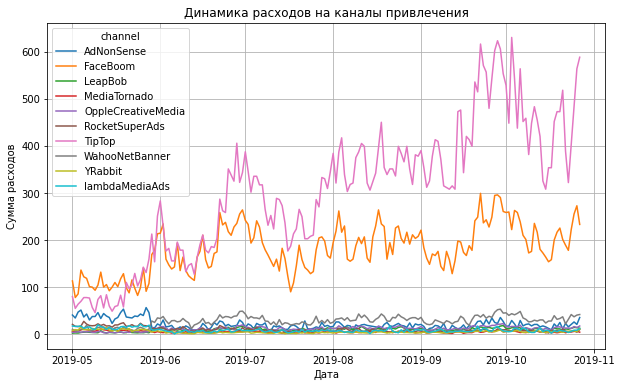

In [31]:
date_channel.plot(grid=True, figsize=(10, 6), title = 'Динамика расходов на каналы привлечения').set(
                  xlabel = 'Дата', ylabel = 'Cумма расходов');

Можно заметить, что в основном растут только затраты на привлечение пользователей из источников TipTop и FaceBoom, в то время как остальные каналы имеют практически неизменно низкие финансовые вложения. 

- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [32]:
#исключим из выдачи пользователей, нашедших приложение самостоятельно, и посчитаем средний САС по всем источникам привлечения
print('Средний САС по всем пользователям платных каналов:', 
      round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2))

Средний САС по всем пользователям платных каналов: 1.13


In [33]:
#средняя стоимость привлечения одного пользователя (CAC) из каждого источника
mean_cost = profiles.query('channel != "organic"').groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)
mean_cost

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
Name: acquisition_cost, dtype: float64

Как и ожидалось, наибольшую среднюю стоимость имеют самые успешные в привлечении пользователей каналы TipTop и FaceBoom. Примечательно, что немалый САС у источника AdNonSense (1.008054), который в то же время является одним из самых непопулярных у пользователей. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно. 

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [34]:
#функция для расчета LTV, ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [35]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [36]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 20))
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Поскольку по условиям задачи мы смотрим данные 1-го ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, установим моментом наблюдения 01.11.2019, а горизонт анализа равным 14 дням

In [37]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

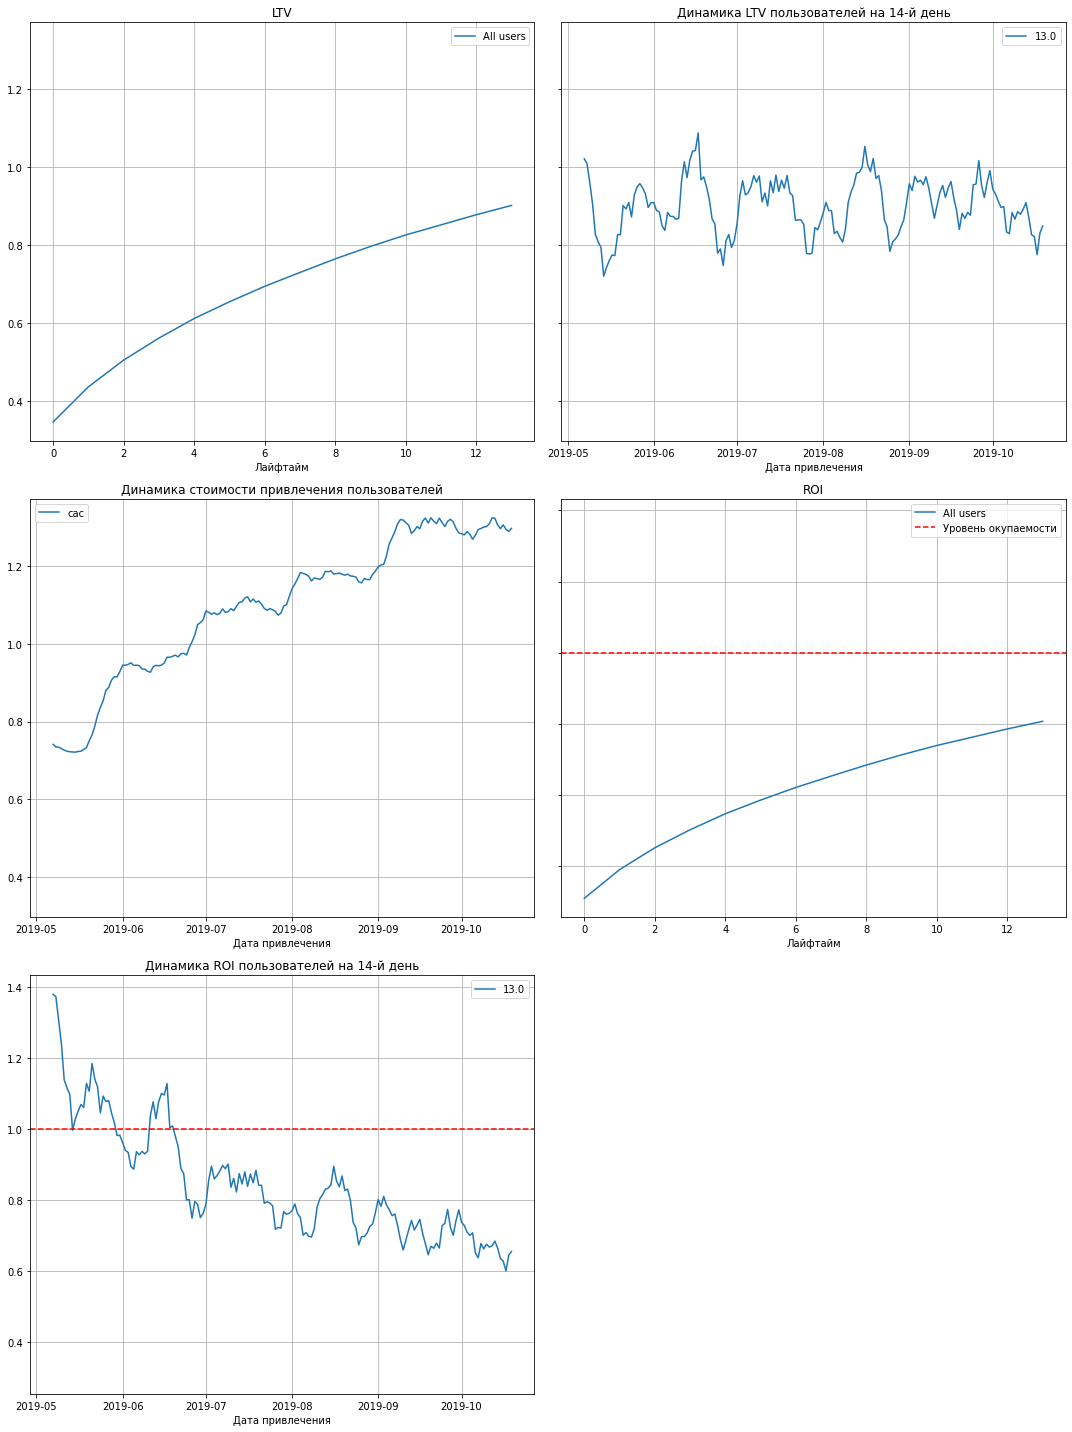

In [38]:
profiles = profiles.query('channel != "organic"') #удалим из расчетов пользователей "organic", нашедших приложение самостоятельно
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Выводы
1. LTV практически неизменен на протяжении всего горизонта анализа
2. Динамика расходов CAC на протяжении всего периода растёт, из этого следует снижение окупаемости ниже предельного уровня (п.3)
3. ROI ниже уровня окупаемости 
4. Пользователи перестают окупаться уже в июне, окончательно в июле, реклама не окупается к концу второй недели и дотягивает только до уровня 80%, что идет вразрез с бизнес-планом


- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

In [39]:
#функция для расчета удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [40]:
#функция для расчета конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [41]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [42]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

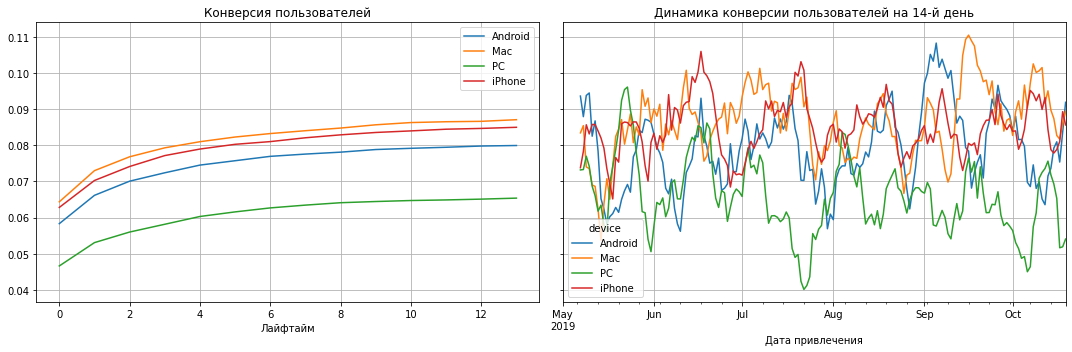

In [45]:
# конверсия с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Чаще плательщиками становятся пользователи Mac, iPhone и Android, нежели PC. Других особенностей по признаку устройства при анализе конверсии не было обнаружено. 

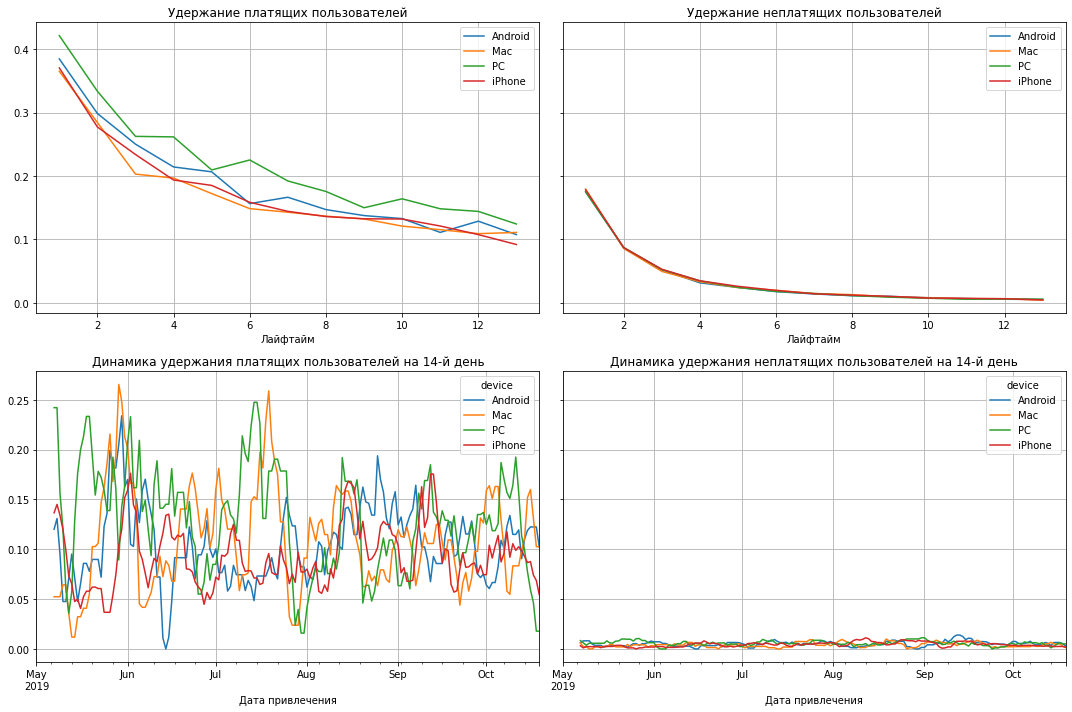

In [46]:
# удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, horizon_days)

Незначительно выше удерживаются неплатящие пользователи PC, но значительных отличий и особенностей не наблюдается, динамика удержания примерно одинаковая. 

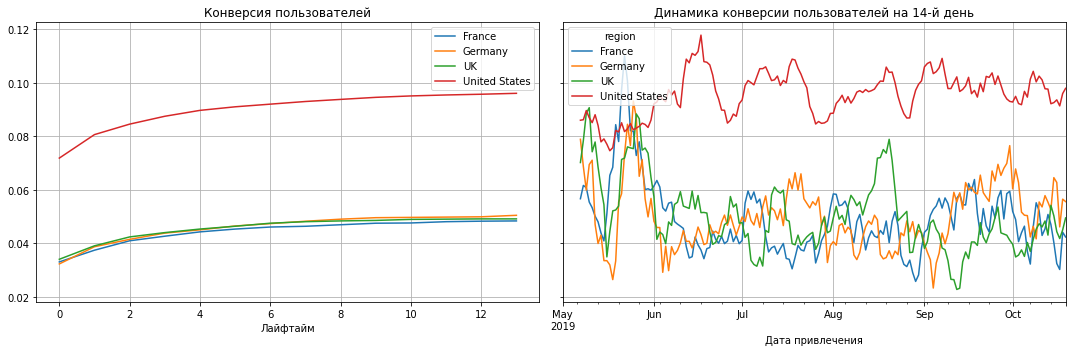

In [47]:
# конверсия по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая большая конверсия пользователей из США, в других странах конверсия примерно одинаковая, в два раза меньше, чем в США.

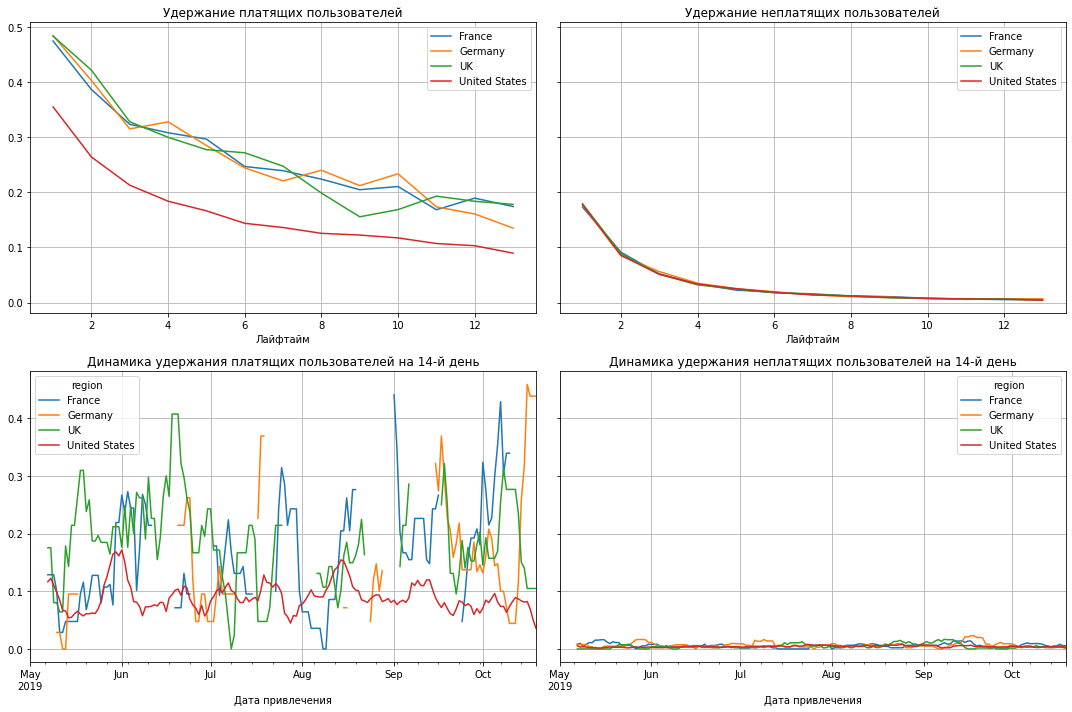

In [48]:
#удержание по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

Коэффициент удержания платящих пользователей меньше всех для пользователей из США, при этом для пользователей из других стран коэффициент удержания примерно одинаковый. То есть при высокой конверсии покупатели США быстро уходят с сайта.

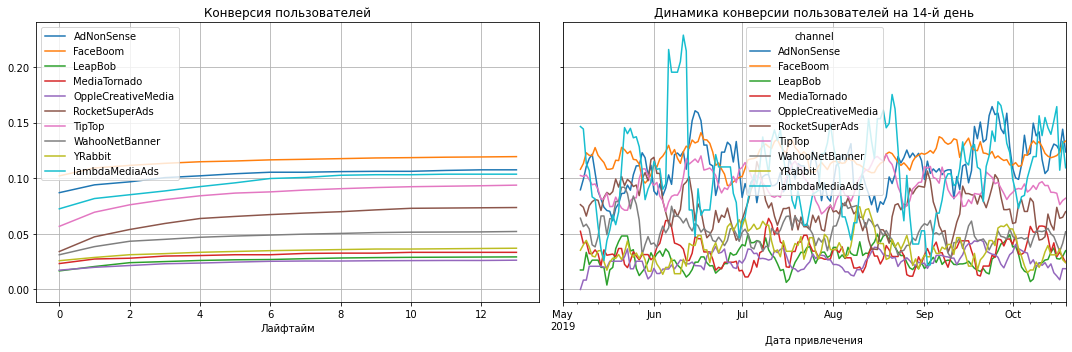

In [49]:
#конверсия по источникам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия у разных источников сильно не отличается, при этом можно выделить высокую конверсию пользователей для каналов FaceBoom, AdNonSense, lambdaMediaAds, Tiptop.

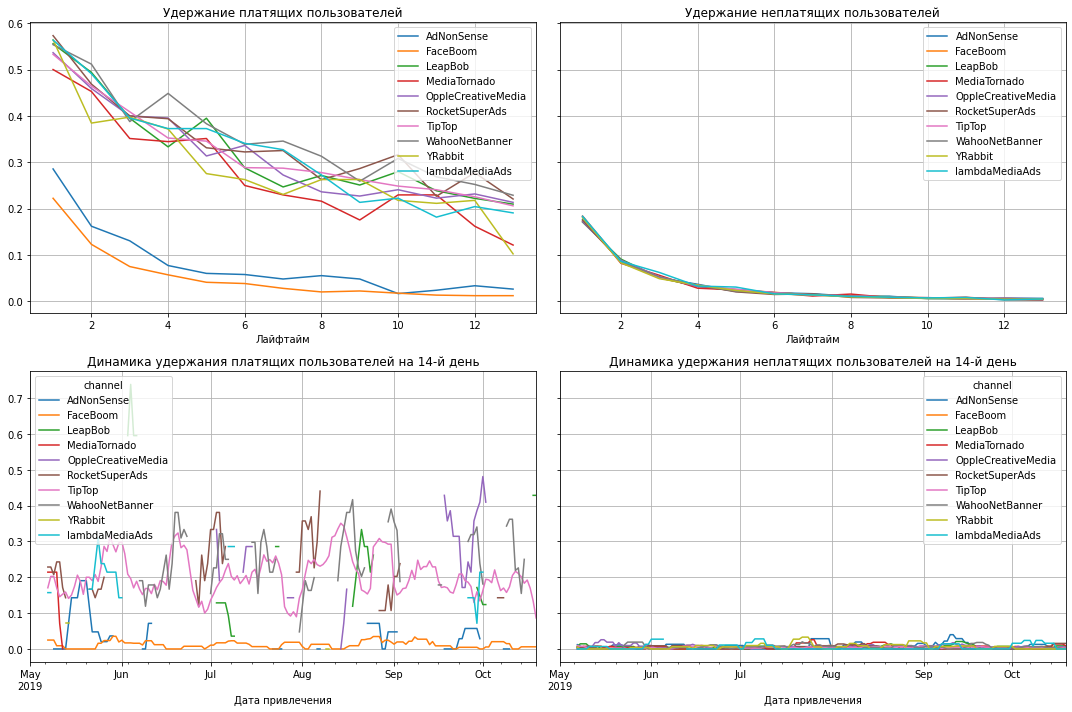

In [50]:
#коэффициент удержания по источникам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

В основном коэффициент удержания платящих пользователей у всех каналов одинаковый. Примечательно, что выделяются по низкому коэффициенту удержания источники AdNonSense и FaceBoom, имеющие высокую конверсию пользователей в плательщиков.  

- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

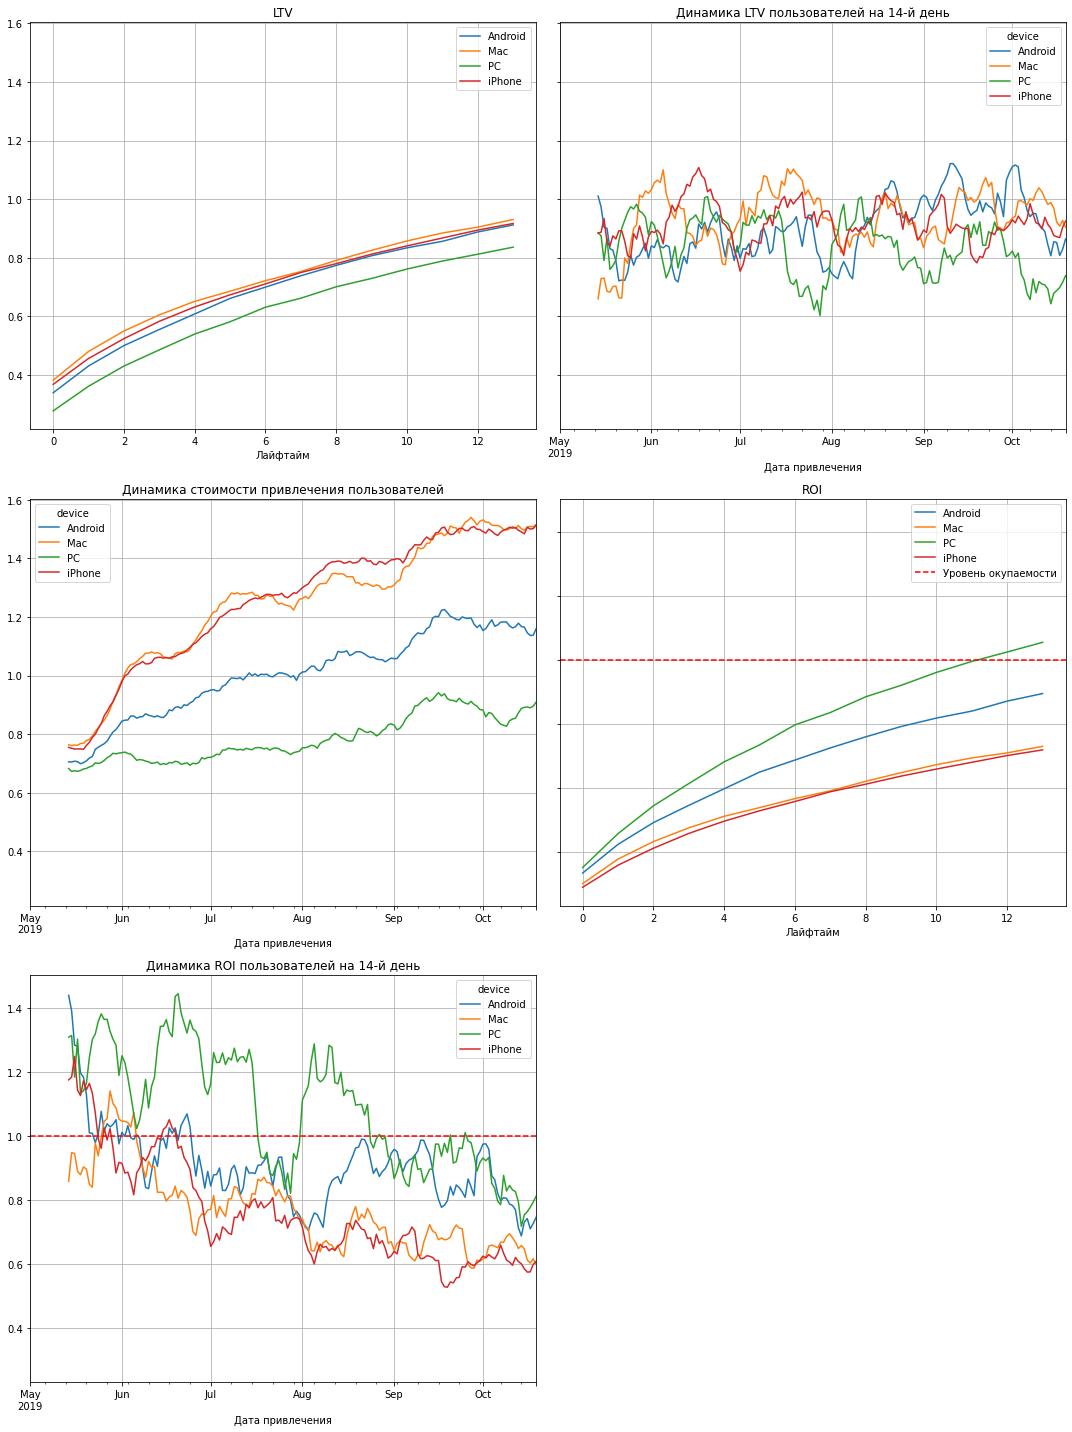

In [51]:
#окупаемость с разбивкой по устройствам
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


- LTV растет примерно одинаково для пользователей всех устройств (LTV меньше для пользователей PC, но динамика схожая с пользователями других устройств)
- Стоимость привлечения пользователей также растет, при этом самая большая стоимость видна для пользователей Mac, iPhone
- Не окупаются пользователи почти всех девайсов в динамике, кроме PC, но в последнем случае ROI незначительно выше границы окупаемости и это не стабильная тенденция. Наименее окупаемыми являются польозователи Mac, iPhone, которые при этом имеют наибольшую стоимость привлечения, что свидетельствует о необходимости для компании пересмотреть стратегии финансирования привлечения пользователей
- На 14-й день единственная категория устройств, о пользователях которой можно говорить, что они окупились, также является PC

- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

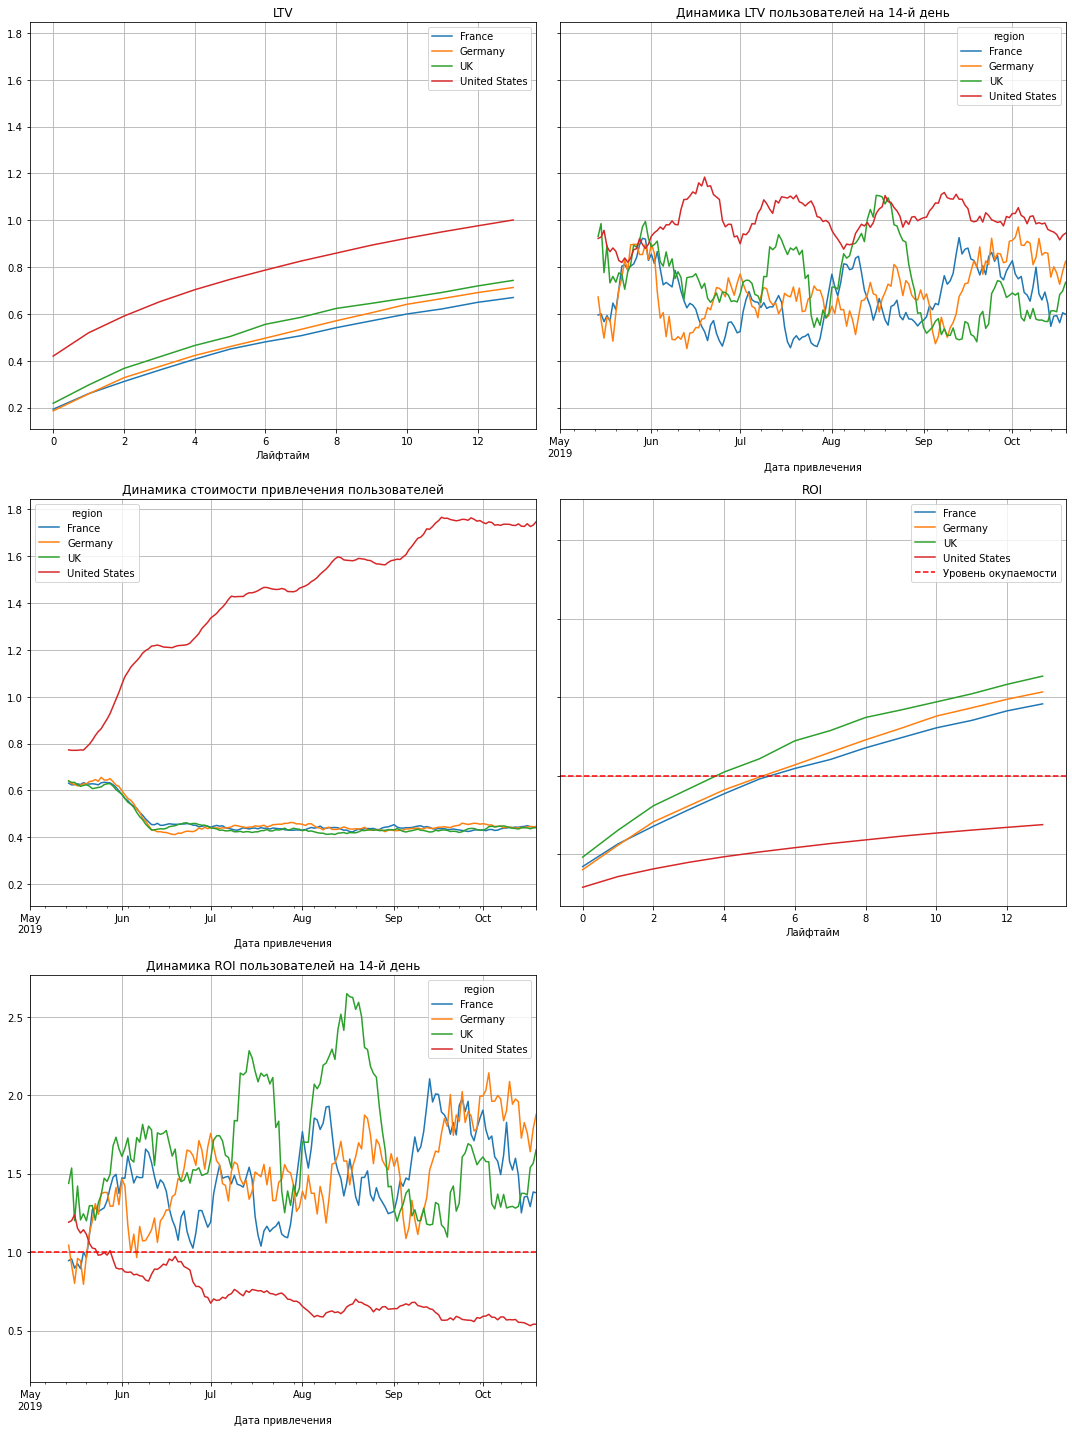

In [52]:
# окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- Для пользователей из США заметна наибольшая общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок, в динамике, пользователи из других стран дают примерно одинаковую LTV
- Показатели LTV в данном случае коррелируют с динамикой стоимостью привлечения пользователей, которая растет только для пользователей из США, а для пользователей из других стран остается стабильно низкой
- Парадоксально, что США является единственной страной, для пользователей из которой уровень окупаемости ниже допустимого порога в 100%: ROI в итоге упал почти до 50%.
Таким образом, компании нужно полностью поменять стратегию распределения расходов, так как убытки от затрат на привлечение пользователей из США полностью перекрывают доходы от пользователей из окупающихся стран

- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

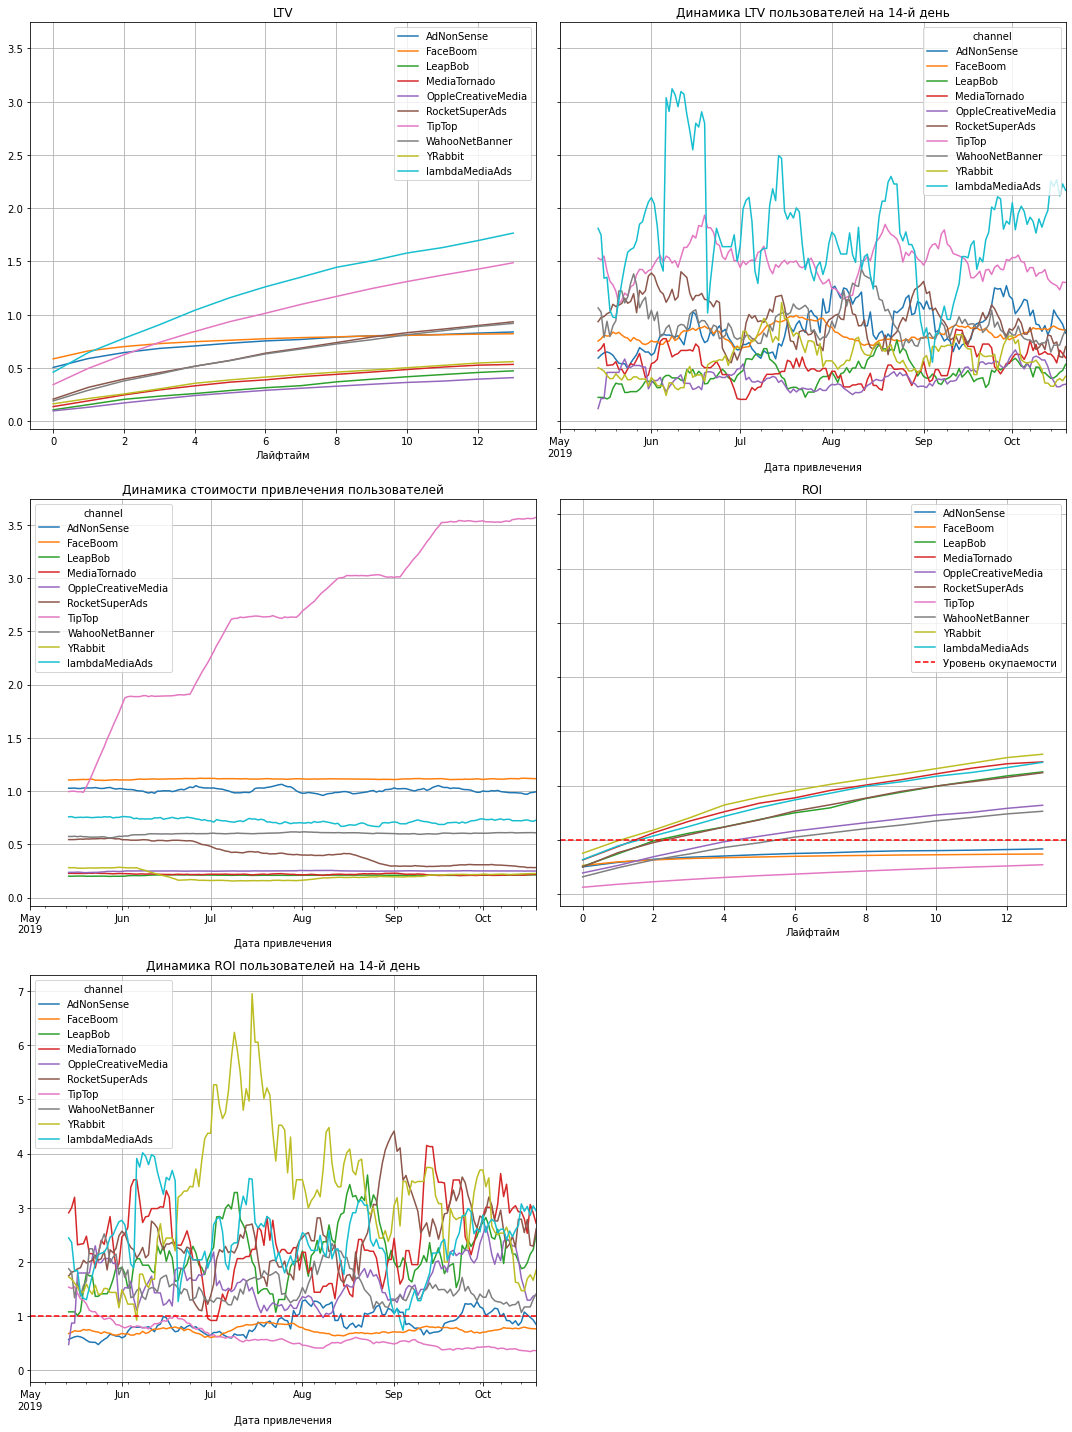

In [53]:
#окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- LTV для всех каналов достаточно разный, но выделяются с наиболльшим LTV пользователи, пришедшие из каналов lambdaMediaAds и TipTop
- Стоимость привлечения пользователей по разным каналам остается примерно неизменной (статична), за исключением канала TipTop, стоимость привлечения для которого растет, что коррелирует с LTV
- Вновь неожиданные результаты (демонстрирующие неверные стратегии компании) в динамике ROI, так как единственными не окупающимися каналами являются TipTop (с ростом затрат на привлечение пользователей), FaceBoom, AdNonSense
- Наоборот, YRabbit, имеющий почти наименьшую стоимость привлечения, демонстрирует высокие показатели окупаемости

- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

- В целом реклама не окупается, к 14 дню доходит только до 80% (0.8)
1. Устройства: пользователи почти всех девайсов не окупаются, особенно большие убытки приносят юзеры IOS, наименьшие убытки приносят пользователи PC, но они так же приносят очень мало прибыли (едва пересекают черту окупаемости)
2. Страны: наибольший убыток приносят пользователи США, так как имеют, помимо наибольшего LTV, также наибольшие и растущие расходы на привлечение
3. Рекламные каналы: наиболее убыточными являются каналы TipTop (с ростом затрат на привлечение пользователей), FaceBoom, AdNonSense. Первый канал имеет постоянно растущую стоимость привлечения пользователь, а два других стабильно высокую (по отношению к остальным каналам) стоимость привлечения пользователей. При этом ни один из трех источников не окупается. Проблема для TipTop  заключается в том, что, несмотря на рост LTV, САС также постоянно растет (с относительно большей скоростью), за счет чего доход не выходит в плюс. Проблема с двумя другими каналами заключается в том их LTV значительно росла только в первые дни, а в дальнейшем оставалась почти неизменной. 

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

##### Результаты исследования:
- В результате предобработки данных исправлены нарушения стиля в наименовании столбцов (snake_case и приведение к нижнему регистру) и устранено несоотвествие типа данных в столбцах, в которых обозначена дата: с типа object на datetime. Дубликаты и пропуски отсутствуют.
###### Профиль пользователя
- Чаще всего пользователи в приложение приходят из США - 67%, оставшаяся доля приходится почти поровну на пользователей Великобритании, Франции и Германии. Меньше всего пользователей в приложении родом из Германии (10%). На США также приходится больше всего платящих пользователей - 7%, в то время как во всех остальных странах доля плательщиков составляет около 4%.
- Больше всего пользователей приложения используют гаджеты марки iPhone (54479 пользователей), количество юзеров, использующих устройства других марок, распределено примерно одинаково (около 30 тыс.). Больше всего плательщиков используют Mac (6.36%) и iPhone (6.21%). Примечательно, что пользователей iPhone среди "клиентов" приложения больше, чем пользователей Mac, но доля плательщиков среди последних больше. 
- Большая часть пользователей приходит в приложение самостоятельно (56439), при этом среди них меньше всего плательщиков (2.06%). Следующие самые крупные платные рекламные источники -FaceBoom и TipTop, они суммарно дают компании почти 50% пользователей, эти же источники привлекают больше всего плательщиков (12.2%) и (9.6%) соответственно. Также большая доля плательщиков у источников lambdaMediaAds и AdNonSense, но этот результат нельзя считать в полной мере репрезентативным, так как источники в целом привлекают меньше всех пользователей (2149 и 3880 соответственно).
###### Маркетинг
- Существуют источники, на которые тратится основная доля финансов - TipTop(51.90%) и FaceBoom(30.75%), эти же источники являются лидирующими по привлечению пользователей.
- В основном растут только затраты на привлечение пользователей из источников TipTop и FaceBoom, в то время как остальные каналы имеют практически неизменно низкие финансовые вложения.
- Наибольшую среднюю стоимость имеют самые успешные в привлечении пользователей каналы TipTop и FaceBoom. Примечательно, что немалый САС у источника AdNonSense (1.008054), который в то же время является одним из самых непопулярных у пользователей.
###### Окупаемость рекламы 
1. LTV практически неизменен на протяжении всего горизонта анализа
2. Динамика расходов CAC на протяжении всего периода растёт, из этого следует снижение окупаемости ниже предельного уровня (п.3)
3. ROI ниже уровня окупаемости
4. Пользователи перестают окупаться уже в июне, окончательно в июле, реклама не окупается к концу второй недели и дотягивает только до уровня 80%, что идет вразрез с бизнес-планом
###### Конверсия и удеражние пользователей
5. Чаще плательщиками становятся пользователи Mac, iPhone и Android, нежели PC
6. Незначительно выше удерживаются неплатящие пользователи PC
7. Конверсия у разных источников сильно не отличается, при этом можно выделить высокую конверсию пользователей для каналов FaceBoom, AdNonSense, lambdaMediaAds, Tiptop.
8. В основном коэффициент удержания платящих пользователей у всех каналов одинаковый. Примечательно, что выделяются по низкому коэффициенту удержания источники AdNonSense и FaceBoom, имеющие высокую конверсию пользователей в плательщиков.
###### Рекомендации отделу маркетинга
- Так как наибольший убыток приносят пользователи США, желательно сфокусироваться на привлечении пользователей из Великобритании и Германии, которые потенциально могут принести большое количество прибыли по результатам аналитики
- Большие убытки приносят пользователи IOS, следует привлекать больше PC и Android пользователей
- Стоит обратить внимание на 3 недооценённых канала с наивысшим ROI: Yrabbit, MediaTornado, lambdaMediaAds
Платящие PC пользователи удерживаются очень хорошо, но конверсия самая низкая. Потенциал есть, нужно обратить внимание на саму рекламу
Самый высокий LTV у канала lambdaMediaAds. Платящим пользователям явно нравится продукт, можно попробовать найти подешевле канал привлечения для этих пользователей, чтобы увеличить ROI